In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/_data.csv")
pd.set_option('display.max_columns', df.shape[1])
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [68]:
# проверка на наличие других городов: сначала выделяем город
df['Город'] = df['Адрес'].str.split(',').str[0].str.strip()
# Затем группируем по городу
df.groupby('Город').size().reset_index(name='количество')

# Фильтруем изначальный датасет по Москве
df = df[df['Город'] == 'Москва']

In [119]:
df["Цена за месяц"] = df["Цена"].str.split(" ").str[0].astype(float).astype(int) #выводим чистую колонку с информацией о цене за месяц в int

In [120]:
df["Название ЖК"].value_counts(dropna=False) #проверка - является ли год в Названии ЖК лишним 

Название ЖК
NaN                        15281
Символ, 2019                  61
Водный, 2015                  45
Квартал на Ленинском          37
Метрополия, 2021              36
                           ...  
Зодиак                         1
Новопесковский, 2010           1
Русский модерн, 2006           1
Русский модерн, 1905           1
Smolensky De Luxe, 2014        1
Name: count, Length: 1134, dtype: int64

In [ ]:
df["Название ЖК чистое"] = df["Название ЖК"].str.split(",").str[0] #добавление новой колонки с "чистым" названием ЖК без года

In [122]:
df["ЖК год"] = df["Название ЖК"].str.split(",").str[1]

**Разброс цен аренды за месяц квартир по городу Москва**

In [110]:
print(f'Цена за месяц от: {df['Цена за месяц'].min()} до: {df['Цена за месяц'].max()}')

Цена за месяц от: 5000 до: 3000000


In [106]:
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
#график распределения цены (с выбросами, получился не очень наглядным)

# counts = df['Цена за месяц'].value_counts().sort_index()

# plt.figure(figsize=(12,6))
# plt.plot(counts.index, counts.values, color='blue')
# plt.title('Распределение цены за месяц')
# plt.xlabel('Цена за месяц (руб.)')
# plt.ylabel('Количество предложений')
# plt.grid(True)
# plt.show()

__График распредления самых популярных цен аренды (без выбросов)__

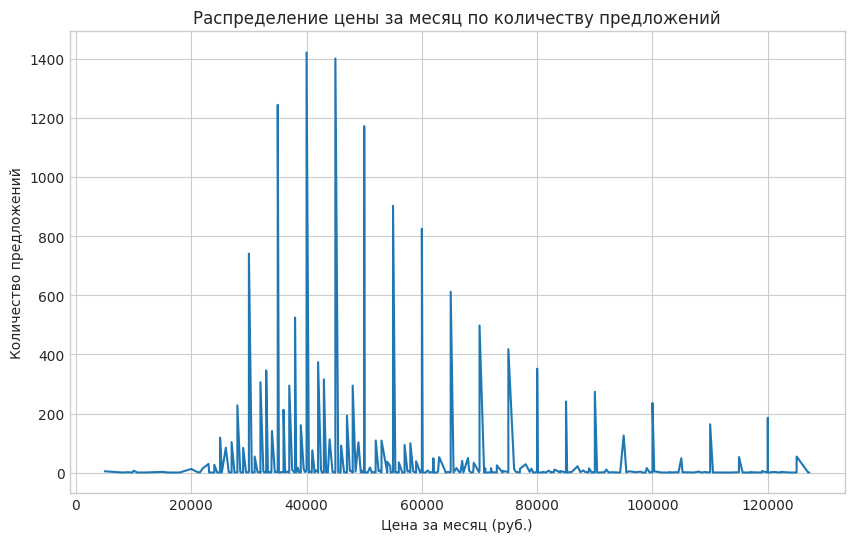

In [117]:
#график распредления цены (без выбросов)

#вычисляем границы 1-го и 3-го квартиля
Q1 = df['Цена за месяц'].quantile(0.25)
Q3 = df['Цена за месяц'].quantile(0.75)
IQR = Q3 - Q1

#фильтруем цены внутри "внутреннего интерквартильного диапазона"
filtered_df = df[(df['Цена за месяц'] >= Q1 - 1.5*IQR) & (df['Цена за месяц'] <= Q3 + 1.5*IQR)]

counts = filtered_df['Цена за месяц'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=counts.index, y=counts.values)
plt.title('Распределение цены за месяц по количеству предложений')
plt.xlabel('Цена за месяц (руб.)')
plt.ylabel('Количество предложений')
plt.show();

In [113]:
# цена по категориям (вообще не наглядный)

# plt.figure(figsize=(10,6))
# sns.histplot(df['Цена за месяц'], bins=range(0, 3100000, 100000), color='skyblue')  # шаг 100k
# plt.title('Распределение цены за месяц')
# plt.xlabel('Цена за месяц (руб.)')
# plt.ylabel('Количество предложений');

**Гистограмма по категориям цен с шагом в 10000**
*(самые популярные цены аренды)*

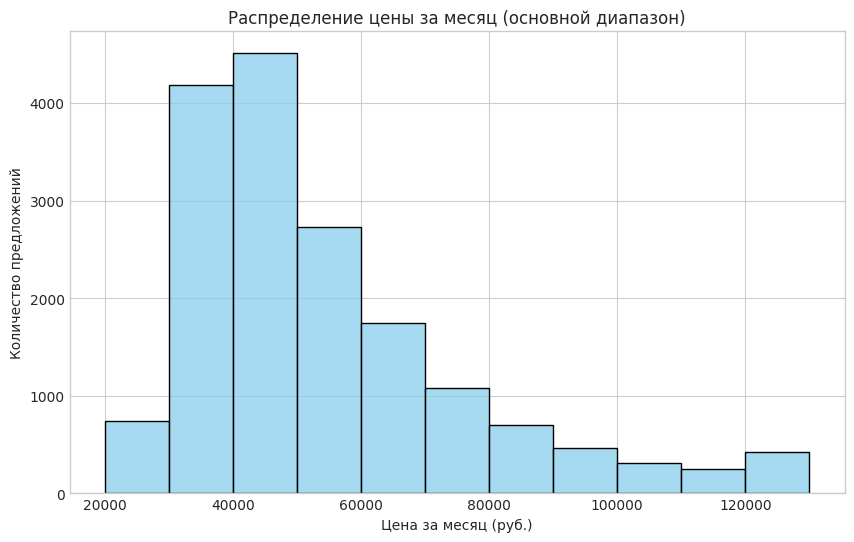

In [115]:
#гистограмма по категориям цен (по основному диапазону, который был продемонстрирован)
filtered_df2 = df[(df['Цена за месяц'] >= 20000) & (df['Цена за месяц'] <= 140000)]

plt.figure(figsize=(10,6))
sns.histplot(filtered_df2['Цена за месяц'], bins=range(20000, 140000, 10000), kde=False, color='skyblue')
plt.title('Распределение цены за месяц (основной диапазон)')
plt.xlabel('Цена за месяц (руб.)')
plt.ylabel('Количество предложений')
plt.show()

**Топ-20 ЖК по количеству предложений аренды**

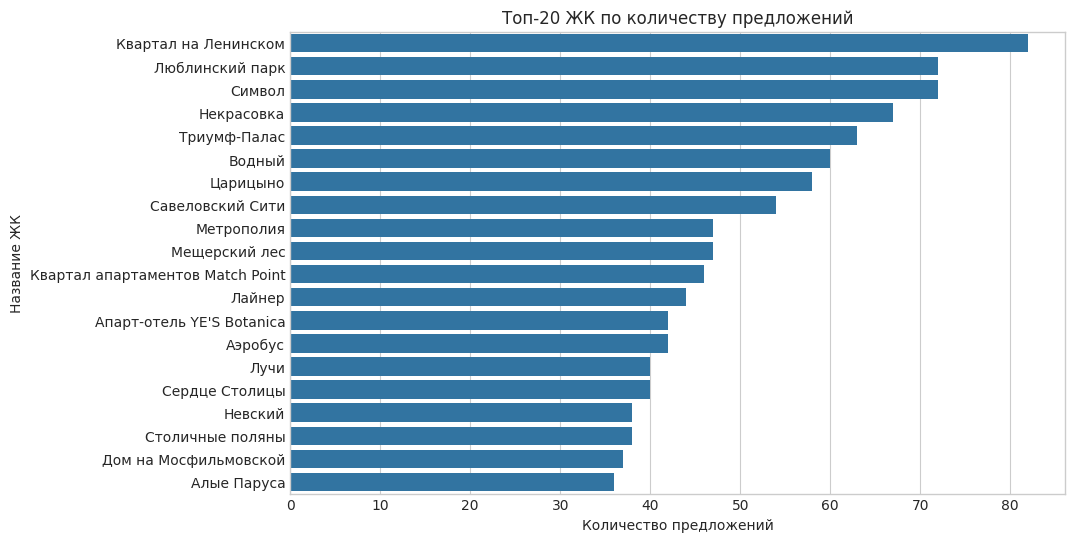

In [101]:
#топ предложений по ЖК

top_jk = df['Название ЖК чистое'].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_jk.values, y=top_jk.index) #, hue=top_jk.index, palette="deep")
plt.title('Топ-20 ЖК по количеству предложений')
plt.xlabel('Количество предложений')
plt.ylabel('Название ЖК')
plt.show();

**Гистограмма количества предложений с разрешением/запретом на аренду с детьми или животными**

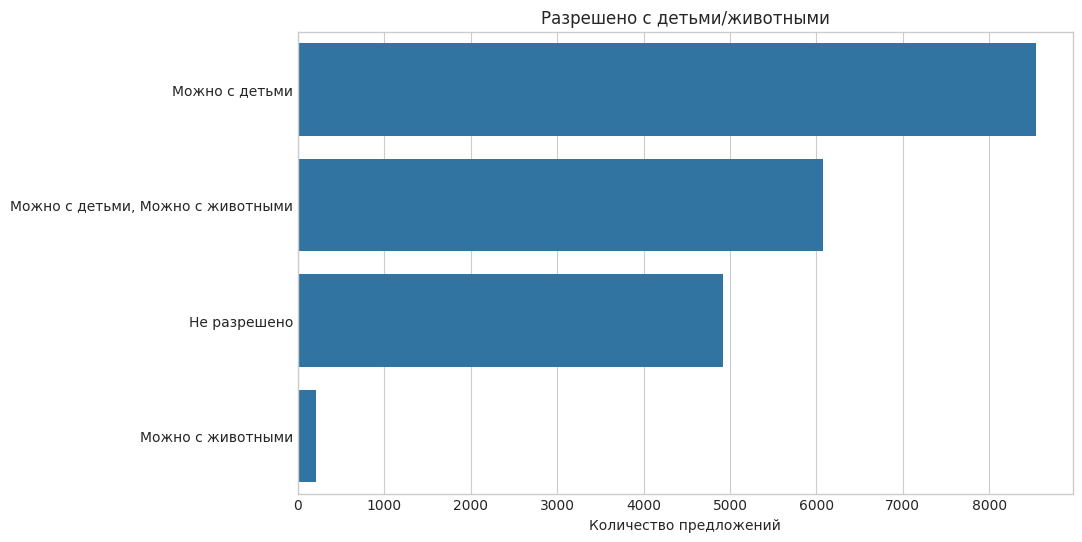

In [102]:
#количество предложений можно с животными/детьми

counts = df['Можно с детьми/животными'].value_counts(dropna=False)

labels = counts.index.to_series().replace({np.nan: 'Не разрешено'})

plt.figure(figsize=(10,6))
sns.barplot(x=counts.values, y=labels) #, hue=labels, palette="Set2")
plt.title('Разрешено с детьми/животными')
plt.xlabel('Количество предложений')
plt.ylabel('')
plt.show()

In [79]:
df.columns.to_list()

df['Ремонт'].value_counts(dropna=False).head(20)

Ремонт
Косметический    7361
Евроремонт       7004
Дизайнерский     2773
NaN              2463
Без ремонта       136
Name: count, dtype: int64

**Распределение количества предложений в зависимости от ремонта арендуемого жилья**

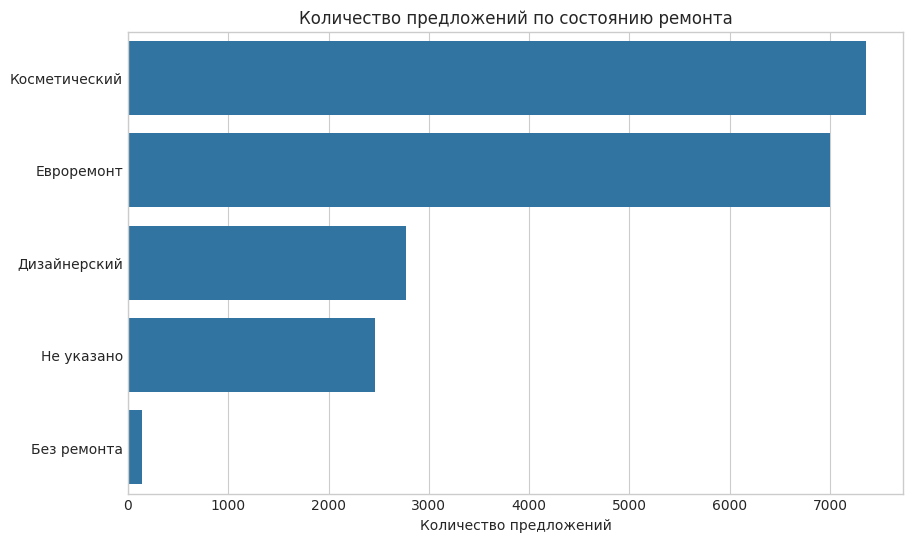

In [103]:
counts = df['Ремонт'].value_counts(dropna=False)

labels = counts.index.to_series().replace({np.nan: 'Не указано'})

plt.figure(figsize=(10,6))
sns.barplot(x=counts.values, y=labels) #, hue=labels, palette="viridis")
plt.title('Количество предложений по состоянию ремонта')
plt.xlabel('Количество предложений')
plt.ylabel('')
plt.show()